### Import the necessary packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

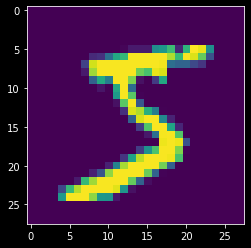

In [6]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2158 - accuracy: 0.9518 - val_loss: 0.0964 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0682 - accuracy: 0.9794 - val_loss: 0.0674 - val_accuracy: 0.9805
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0852 - val_accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.1202 - val_accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.1036 - val_accuracy: 0.9777


### Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.1035672277212143, 0.9776999950408936]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 177ms/step
[[6.43197941e-15 8.71634543e-21 7.98728167e-11 7.08215517e-12
  2.27718335e-18 1.36703092e-15 2.37176042e-22 1.00000000e+00
  4.51405352e-13 4.25453591e-13]
 [4.56659687e-15 1.54588287e-10 1.00000000e+00 1.20107971e-13
  1.86926159e-19 3.90255250e-20 1.16102319e-11 4.27834925e-23
  7.33884963e-17 1.86307852e-23]
 [1.37352282e-10 9.99961138e-01 3.40877750e-06 1.50240779e-12
  1.99599867e-07 1.10004057e-05 6.72304851e-11 7.78906983e-09
  2.42337919e-05 3.74607870e-13]
 [1.00000000e+00 5.39840355e-16 1.03082355e-10 4.23198737e-17
  8.17481194e-10 2.49619574e-12 1.66041558e-09 5.06253395e-17
  3.02219919e-13 5.55243709e-08]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [16]:
model.save("model.h5")

### Test the saved model

In [22]:
model=load_model("model.h5")

In [23]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 435ms/step
0    8
Name: Label, dtype: int64
